<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220311_normalization(min_max_z_score).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 정규화(Normalization)
https://hleecaster.com/ml-normalization-concept/

데이터가 가진 feature의 스케일이 심하게 차이나는 경우 문제가됨

예를 들어, feature로 방의 개수(개), 건축년수(년)가 있을때, 둘사이를 비교한다면,

 더 큰 스케일을 가진 건축년수(년)에 의해 데이터가 좌지우지 될 것

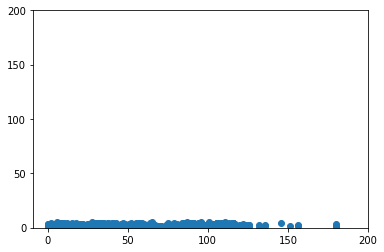

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/manhattan.csv.txt')
df.columns
plt.scatter(df['building_age_yrs'], df['bedrooms'])
plt.xticks([0, 50, 100, 150, 200])
plt.yticks([0, 50, 100, 150, 200])
plt.show()

위와 같이 같은시기에 지어진 집의 방개수 차이를 인식하기 어려워 진다

(중요하지 않은것으로 보이게 된다)

따라서 모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는게 정규화(Normalization)의 목표

### 데이터를 정규화 하는 두가지 방법
> - 1. Min-Max Normalization(최소-최대 정규화)
> - 2. Z-Score Normalization(Z-점수 정규화)

#### 1. Min-Max Normalization(최소-최대 정규화)
 - 모든 feature에 대해 0과 1사이 값으로 변환

In [100]:
def min_max_normalization(lst):
  normalized = []

  for value in lst:
    normalized_num = (value - min(lst)) / (max(lst) - min(lst))
    normalized.append(normalized_num)

  return normalized

최소-최대 정규화의 치명적 단점 : 이상치(outlier)에 큰 영향을 받는다

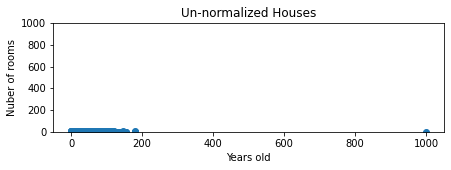

In [109]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/manhattan_norm.csv')

plt.figure(figsize=(7, 2))
plt.scatter(df['building_age_yrs'], df['bedrooms'])
plt.xticks([0, 200, 400, 600, 800, 1000])
plt.yticks([0, 200, 400, 600, 800, 1000])
plt.xlabel('Years old')
plt.ylabel('Nuber of rooms')
plt.title("Un-normalized Houses")
plt.show()

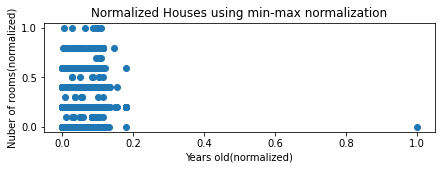

In [106]:
plt.figure(figsize=(7, 2))
plt.scatter(min_max_normalization(df['building_age_yrs']), min_max_normalization(df['bedrooms']))
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks([0, 0.5, 1])
plt.xlabel('Years old(normalized)')
plt.ylabel('Nuber of rooms(normalized)')
plt.title("Normalized Houses using min-max normalization")
plt.show()

위와 같이 y축에서는 정규화가 효과적으로 적용되었으나, x축에서는 한쪽으로 쏠려있다.

이상태로 데이터의 점들을 비교하면, y축의 영향이 지배적일 것

→ 이러한 단점을 보완하려면 Z-점수 정규화를 고려

#### Z-Score Normalization(Z-점수 정규화)
이상치(outlier)문제를 피하는 데이터 정규화 전략

In [107]:
def z_score_normalize(lst):
    normalized = []
    for value in lst:
        normalized_num = (value - np.mean(lst)) / np.std(lst)
        normalized.append(normalized_num)
    return normalized 

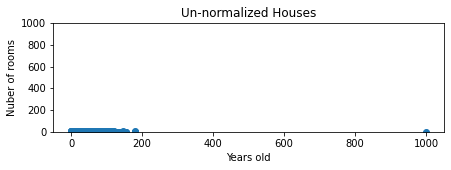

In [110]:
plt.figure(figsize=(7, 2))
plt.scatter(df['building_age_yrs'], df['bedrooms'])
plt.xticks([0, 200, 400, 600, 800, 1000])
plt.yticks([0, 200, 400, 600, 800, 1000])
plt.xlabel('Years old')
plt.ylabel('Nuber of rooms')
plt.title("Un-normalized Houses")
plt.show()

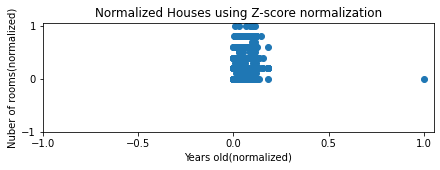

In [112]:
plt.figure(figsize=(7, 2))
plt.scatter(min_max_normalization(df['building_age_yrs']), min_max_normalization(df['bedrooms']))
plt.xticks([-1, -0.5, 0, 0.5, 1])
plt.yticks([-1, 0, 1])
plt.xlabel('Years old(normalized)')
plt.ylabel('Nuber of rooms(normalized)')
plt.title("Normalized Houses using Z-score normalization")
plt.show()

데이터가 여전히 찌그러져 보이긴 하지만, 거의 모든 점들이 x축과 y축에서 0과 1사이에 있다.

어느정도 비슷한 스케일로 나타낸 셈